# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: 
- `Glucose`: 
- `BloodPressure`: 
- `SkinThickness`: 
- `Insulin`: 
- `BMI`: 
- `DiabetesPedigreeFunction`: 
- `Age`: 
- `Outcome`: 

# Based on the csv column values,

Pregnancies: int64
Glucose: int64
BloodPressure: int64
SkinThickness: int64
Insulin: int64
BMI: float64
DiabetesPedigreeFunction: float64
Age: int64
Outcome: int64

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [3]:
import pandas as pd
import numpy as np

# load in data

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1  


3. How many columns (features) does the data contain?

In [17]:
# print number of columns


print(diabetes_data.columns)

print("\nThere are totally " + str(len(diabetes_data.columns)) + " columns in the diabetes csv file")  


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

There are totally 9 columns in the diabetes csv file


4. How many rows (observations) does the data contain?

In [21]:
# print number of rows

print("\nThere are totally " + str(len(diabetes_data)) + " rows in the diabetes csv file")



There are totally 768 rows in the diabetes csv file


## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [27]:
# find whether columns contain null values


print(diabetes_data.info())


""" 
From this, as a initial analysis we can see that this dataset doesn't have any null columns
"""


# another method

print("\n\n")

print(diabetes_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age       

6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [31]:
# perform summary statistics

print("SUMMARY STATISTICS: \n")
print(diabetes_data.describe())


SUMMARY STATISTICS: 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%

7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**: From the summary statistics analysis, we can see that that MIN value for these above mentioned 5 columns are shown as "0", but practically its not possible to have blood pressure or BMI as 0, so they are incorrect.

Suspecting a missing values in the columns.

8. Do you spot any other outliers in the data?

**Your response to question 8**: 

By the quick analysis on dataset statistics, The max value of the Insulin column is 846, which is abnormally high.Then tThe mam value of the Pregnancies column is 17. While having 17 pregnancies is not impossible, this case might be something to look further into to determine its accuracy.

Steps:

#Calculate the Mean and Standard Deviation:

Mean gives the central value of the dataset.
Standard deviation shows how spread out the data is around the mean.

##Set a Threshold for Outliers:

A typical rule is to define data points as outliers if they fall outside the range:

Lower Bound=Mean−(k×Standard Deviation)
Upper Bound=Mean+(𝑘×Standard Deviation)

Commonly used values for k are:

k=2: Moderately strict (covers ~95% of data in normal distribution).

k=3: More strict (covers ~99.7% of data).

###Identify Outliers:

Any data point below the lower bound or above the upper bound is c






Standard Deviation (SD)
The standard deviation measures how spread out the numbers are around the mean. A small standard deviation means the numbers are close to the mean, while a large one indicates they are spread out.

How to calculate standard deviation:

Find the mean.
Subtract the mean from each number to find the differences.
Square each difference.
Find the mean of these squared differences.
Take the square root of that mean.onsidered an outlier.

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [34]:
# replace instances of 0 with NaN

diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [36]:
# find whether columns contain null values after replacements are made

print(diabetes_data.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [42]:
# print rows with missing values

print(diabetes_data[diabetes_data.isnull().any(axis=1)])

# NOTE: any(axis=1): Evaluates each row (axis=1) and returns True if any column in that row has a null value.

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
5              5    116.0           74.0            NaN      NaN  25.6   
7             10    115.0            NaN            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0            NaN      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age Outcome  
0                       0.627   50       1  
1                    

12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**: 

Point 1: Most rows with missing data have missing values in more than one column.

Point 2: Every single row with at least one missing value also has a missing value in the Insulin column.

Point 3: This is a clue as to why the data is missing! If patients did not have their insulin measured, why might they also not have had these other measurements taken?

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

# print data types using .info() method


print(diabetes_data.info())


"""

<<< Our previous analyis, just for comparison  >>>

Pregnancies: int64
Glucose: int64
BloodPressure: int64
SkinThickness: int64
Insulin: int64
BMI: float64
DiabetesPedigreeFunction: float64
Age: int64
Outcome: int64

"""

14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [54]:
# print unique values of Outcome column

print(diabetes_data['Outcome'].value_counts())

print("\n",diabetes_data.Outcome.unique())


Outcome
0    494
1    268
O      6
Name: count, dtype: int64

 ['1' '0' 'O']


15. How might you resolve this issue?

**Your response to question 15**:

Point 1 : observed string character as value ("O") in column Outcome, instead of zero (0)
Point 2: so, we can solve this by replacing all "O" values as "0" and convert the column outcome to int64

## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

In [69]:
 # Use .value_counts() to more fully explore the values in each column.

for column in diabetes_data.columns:
    print(f"\nValue counts of {column} are: \n")
    print(diabetes_data[column].value_counts())



Value counts of Pregnancies are: 

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

Value counts of Glucose are: 

Glucose
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 135, dtype: int64

Value counts of BloodPressure are: 

BloodPressure
70.0     57
74.0     52
78.0     45
68.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
62.0     34
66.0     30
82.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
52.0     11
54.0     11
75.0      8
92.0      8
65.0      7
94.0      6
85.0      6
48.0      5
96.0      4
44.0      4
98.0      3
100.0     3
106.0     3
110.0     3
55.0      2
30.0      2
104.0     2
46.0      2
108.0     2
61.0      1
38.0      1
24.0      1
1

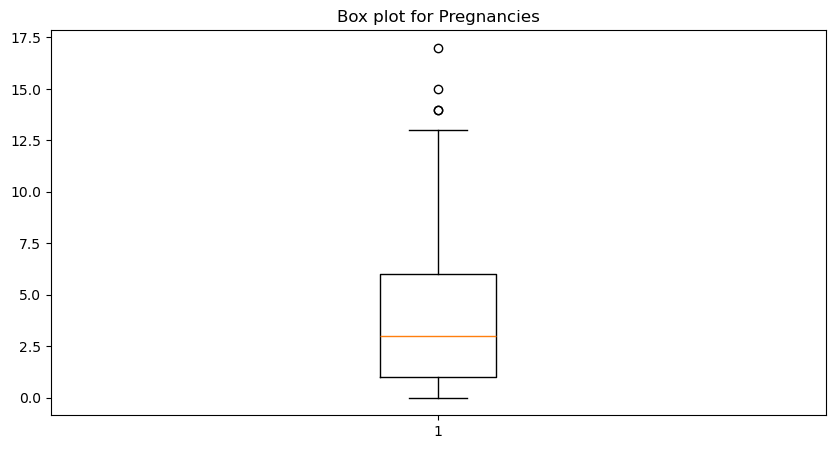

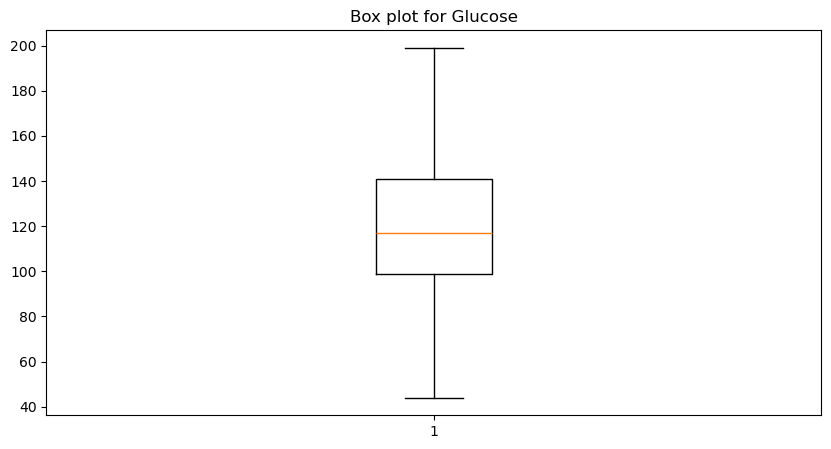

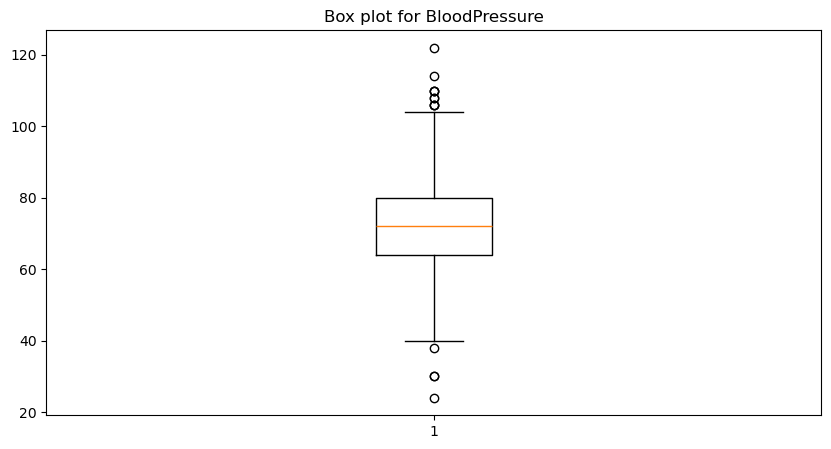

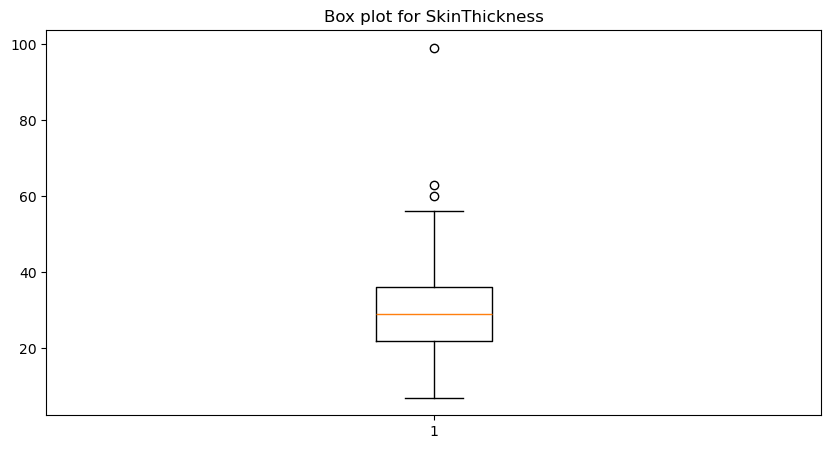

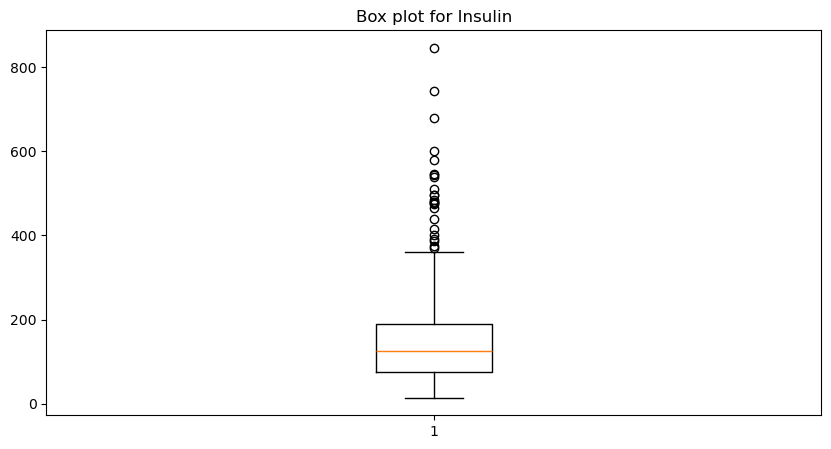

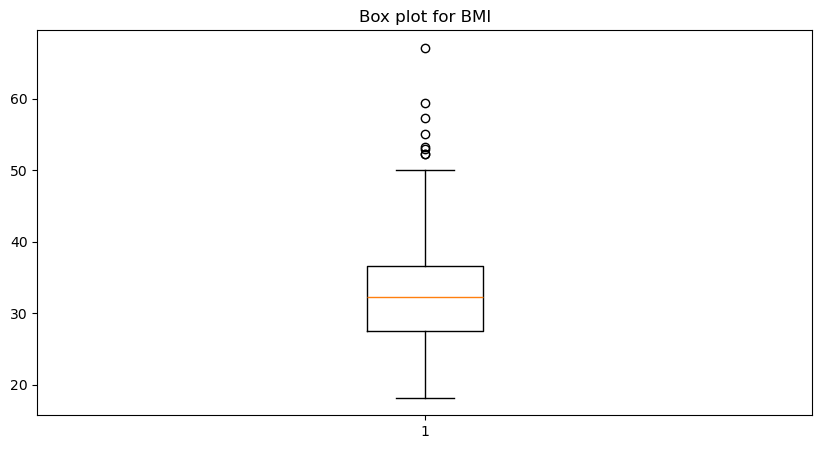

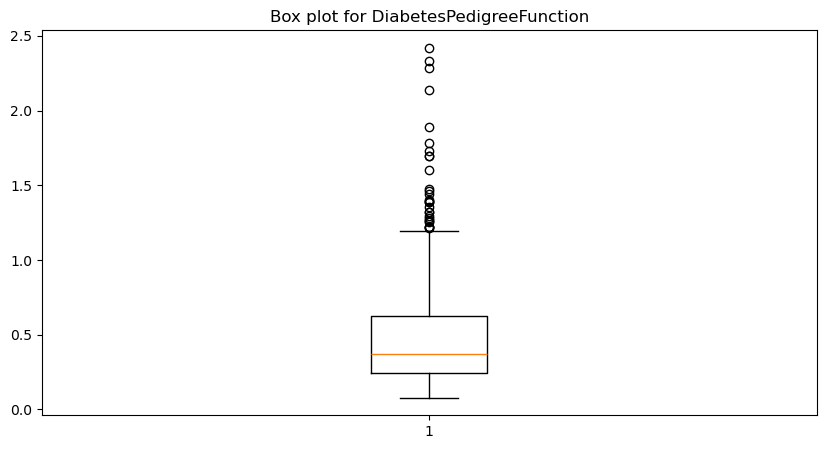

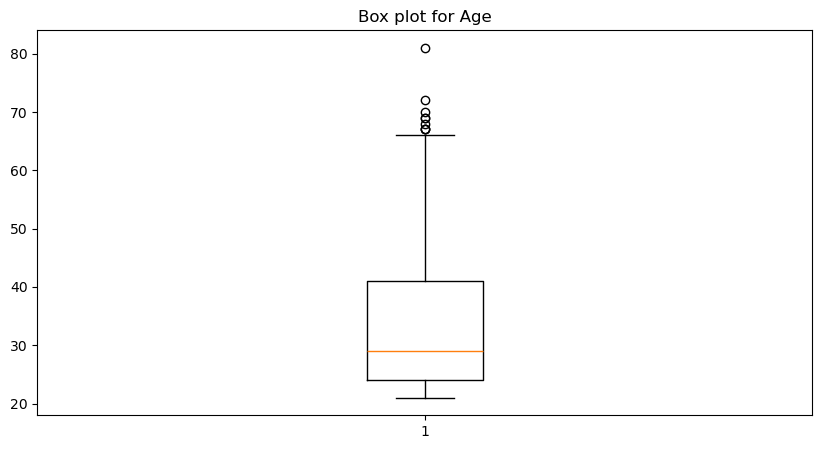

In [71]:
# Investigate other outliers in the data that may be easily overlooked.

import matplotlib.pyplot as plt

for column in diabetes_data.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(10, 5))
    plt.title(f"Box plot for {column}")
    plt.boxplot(diabetes_data[column].dropna())
    plt.show()


In [ ]:
# Instead of changing the 0 values in the five columns to NaN, 
# try replacing the values with the median or mean of each column.

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    # calculating mean value for that chosen column
    
    mean_value = diabetes_data[column].mean()
    diabetes_data[column] = diabetes_data[column].replace(0, mean_value)


